**Introdução a modelos de classificação de dados em Machine Learning**
 
Você sabe como funciona um modelo supervisionado de classificação em machine learning? Na aula de hoje vamos aprender a como criar um classificador automático e inteligente utilizando ferramentas de machine learning. Vamos lá? 😀

**Case: Classificação de insetos gafanhotos e esperanças**

Um certo cientista coletou dados de amostra sobre uma população de insetos da espécie gafanhoto e esperança para realizar um estudo e identificar uma forma de encontrar diferenças entre os tipos de insetos analisando algumas das características presentes no corpo dos insetos.

Com base em suas pesquisas e análises, o cientista identificou que as características do tamanho do abdomên e comprimento das antenas desses insetos podem ser um fator muito relevante para a identificação da espécie.

O cientista precisa encontrar uma maneira de identificar de forma **automática e precisa** os padrões dessas características que podem classificar quando um inseto é do tipo gafanhoto ou do tipo esperança.

Vamos aplicar machine learning para resolver esse problema?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_dados = './gaf_esp.xlsx'

dados = pd.read_excel(path_dados)

In [4]:
dados

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2
...,...,...,...
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Espécie                  100 non-null    object 
 1   Comprimento do Abdômen   100 non-null    float64
 2   Comprimento das Antenas  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


Dados estão ok, sem nulos e com tipos corretos

# Estatísticas descritivas e exploração com gráficos

In [6]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


<AxesSubplot:xlabel='Comprimento do Abdômen', ylabel='Count'>

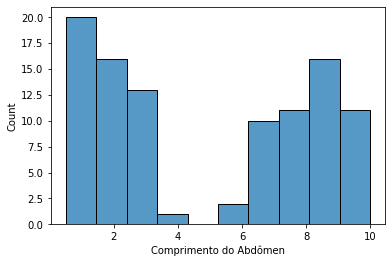

In [12]:
sns.histplot(data=dados, x='Comprimento do Abdômen', bins=10)

<AxesSubplot:xlabel='Comprimento das Antenas', ylabel='Count'>

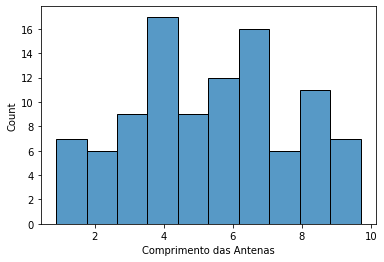

In [11]:
sns.histplot(data=dados, x='Comprimento das Antenas', bins=10)

<AxesSubplot:xlabel='Comprimento das Antenas'>

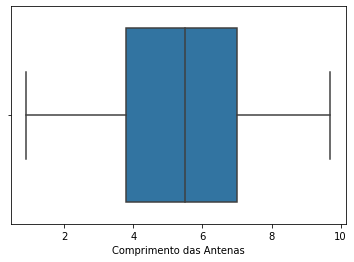

In [10]:
sns.boxplot(data=dados, x='Comprimento das Antenas')

<AxesSubplot:xlabel='Comprimento do Abdômen'>

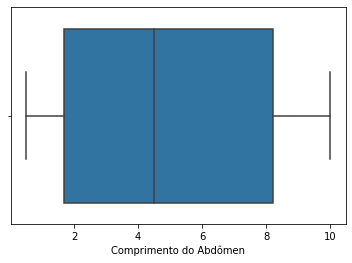

In [13]:
sns.boxplot(data=dados, x='Comprimento do Abdômen')

## Estatísticas por espécie

In [15]:
dados.groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

<AxesSubplot:xlabel='Espécie', ylabel='Comprimento das Antenas'>

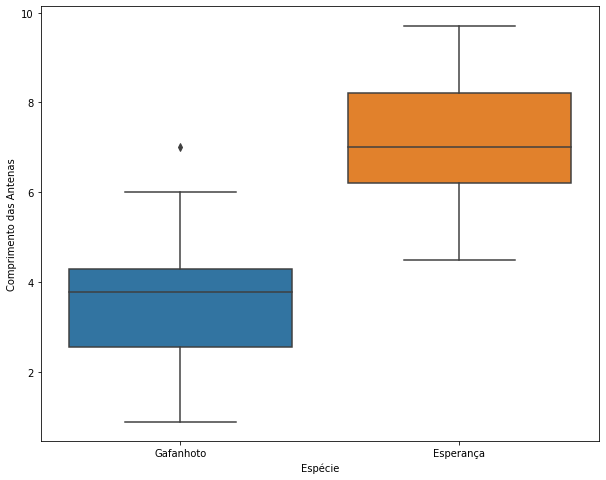

In [21]:
plt.figure(figsize=(10, 8))

sns.boxplot(data=dados, y='Comprimento das Antenas', x='Espécie')

<AxesSubplot:xlabel='Espécie', ylabel='Comprimento do Abdômen'>

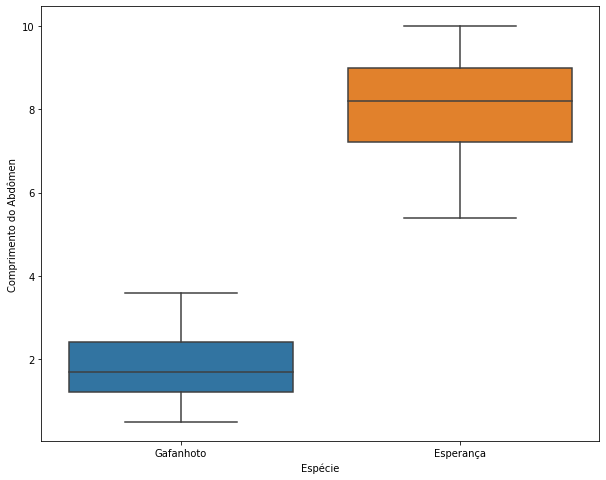

In [22]:
plt.figure(figsize=(10, 8))

sns.boxplot(data=dados, y='Comprimento do Abdômen', x='Espécie')

<AxesSubplot:xlabel='Comprimento das Antenas', ylabel='Comprimento do Abdômen'>

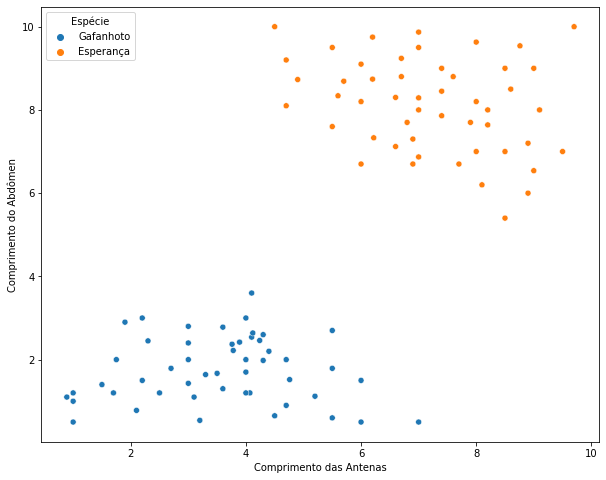

In [23]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=dados, y='Comprimento do Abdômen', x='Comprimento das Antenas', hue='Espécie')

# Criação do modelo

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x = dados[['Comprimento do Abdômen', 'Comprimento das Antenas']]
y = dados['Espécie']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=4, stratify=y)

In [30]:
y_train.value_counts()

Gafanhoto    38
Esperança    37
Name: Espécie, dtype: int64

## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred_knn = knn.predict(x_test)

### Validação

In [37]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [43]:
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy: {acc_knn}')

Accuracy: 1.0
